In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls
import scipy
import scipy.optimize
import scipy.integrate

In [2]:
r_1 = 2.2439608235145855e-09    # in meters
diameter_1 = r_1 * 2
sigma_1 = 5e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter_1, sigma_1, c)

In [3]:
beta = 1
# THIS PIECE WAS WHAT'S DIFFERENT
# previously I write theta_in = (f_1, beta) which creates a tuple, not good for slicing
# should use append so that both f and beta are in one array together, easier for slicing
theta_in = np.append(f_1, beta)

In [4]:
gamma_1 = dls.calc_gamma(20, c, 1e-3, 1.33, np.pi/2, 1.38e-23, 298.15, 638e-9)
time_in = np.linspace(1e-4, 1e-1, 200)
m = 20

In [5]:
simulated_data_1 = dls.g2(theta_in, d, m, gamma_1, time_in)

In [44]:
ndim = 21
nwalkers = 100
nsteps = 1800

In [45]:
start_pos = [theta_in + 1e-4*np.random.randn(ndim) for i in range(nwalkers)] 

In [46]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data_1, m, gamma_1, time_in*0.001))

In [47]:
%time result = sampler.run_mcmc(start_pos, nsteps)

CPU times: user 7min 46s, sys: 3.63 s, total: 7min 50s
Wall time: 8min 9s


In [49]:
sampler.acceptance_fraction

array([0.39      , 0.38444444, 0.38388889, 0.39222222, 0.39611111,
       0.41833333, 0.39055556, 0.39055556, 0.37611111, 0.38611111,
       0.39611111, 0.37388889, 0.39777778, 0.39333333, 0.39888889,
       0.37833333, 0.39444444, 0.37611111, 0.38833333, 0.39722222,
       0.37555556, 0.37666667, 0.385     , 0.40333333, 0.37277778,
       0.37166667, 0.37944444, 0.40055556, 0.37722222, 0.41888889,
       0.37611111, 0.38833333, 0.39555556, 0.38777778, 0.37944444,
       0.37666667, 0.39222222, 0.36111111, 0.385     , 0.38111111,
       0.39222222, 0.38666667, 0.37      , 0.38555556, 0.40277778,
       0.40277778, 0.38722222, 0.35555556, 0.39777778, 0.37888889,
       0.37333333, 0.37555556, 0.39722222, 0.38944444, 0.41111111,
       0.39611111, 0.38944444, 0.39333333, 0.37777778, 0.37944444,
       0.36944444, 0.38388889, 0.38444444, 0.38055556, 0.395     ,
       0.37833333, 0.39055556, 0.40277778, 0.37722222, 0.37222222,
       0.38611111, 0.38611111, 0.39555556, 0.39722222, 0.38611

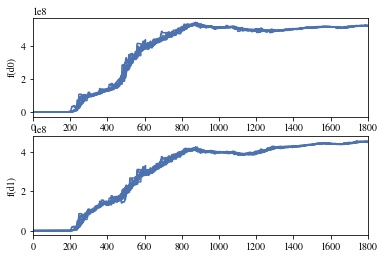

In [50]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

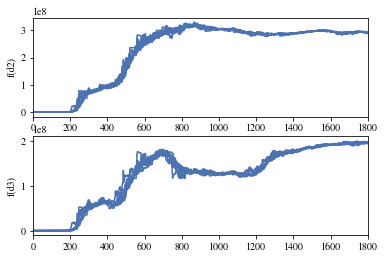

In [51]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

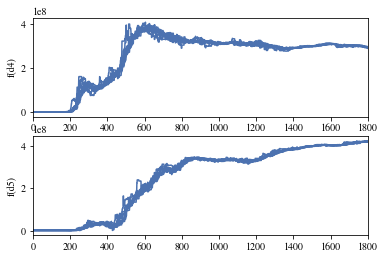

In [52]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax4, ax5) = plt.subplots(2)
ax4.set(ylabel='f(d4)')
ax5.set(ylabel='f(d5)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 4], ax=ax4)
    sns.tsplot(sampler.chain[j, :, 5], ax=ax5)

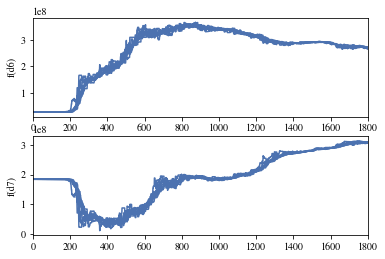

In [53]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax6, ax7) = plt.subplots(2)
ax6.set(ylabel='f(d6)')
ax7.set(ylabel='f(d7)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 6], ax=ax6)
    sns.tsplot(sampler.chain[j, :, 7], ax=ax7)

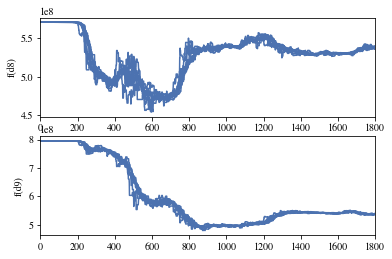

In [54]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax8, ax9) = plt.subplots(2)
ax8.set(ylabel='f(d8)')
ax9.set(ylabel='f(d9)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 8], ax=ax8)
    sns.tsplot(sampler.chain[j, :, 9], ax=ax9)

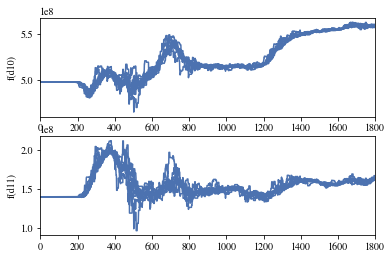

In [55]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax10, ax11) = plt.subplots(2)
ax10.set(ylabel='f(d10)')
ax11.set(ylabel='f(d11)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 10], ax=ax10)
    sns.tsplot(sampler.chain[j, :, 11], ax=ax11)

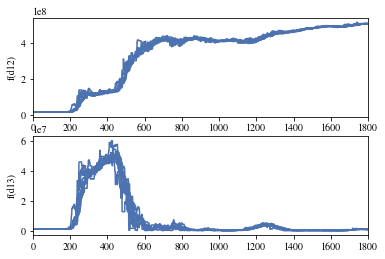

In [56]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax12, ax13) = plt.subplots(2)
ax12.set(ylabel='f(d12)')
ax13.set(ylabel='f(d13)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 12], ax=ax12)
    sns.tsplot(sampler.chain[j, :, 13], ax=ax13)

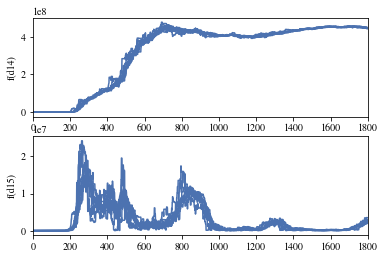

In [57]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax14, ax15) = plt.subplots(2)
ax14.set(ylabel='f(d14)')
ax15.set(ylabel='f(d15)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 14], ax=ax14)
    sns.tsplot(sampler.chain[j, :, 15], ax=ax15)

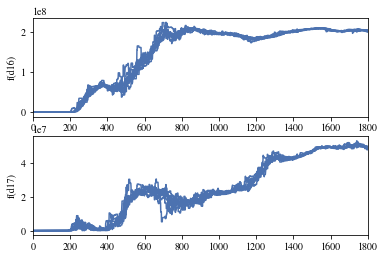

In [58]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax16, ax17) = plt.subplots(2)
ax16.set(ylabel='f(d16)')
ax17.set(ylabel='f(d17)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 16], ax=ax16)
    sns.tsplot(sampler.chain[j, :, 17], ax=ax17)

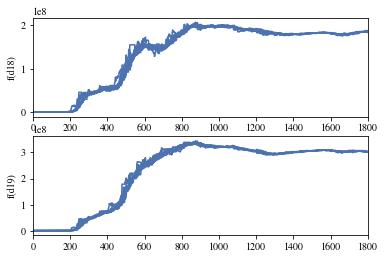

In [59]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax18, ax19) = plt.subplots(2)
ax18.set(ylabel='f(d18)')
ax19.set(ylabel='f(d19)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 18], ax=ax18)
    sns.tsplot(sampler.chain[j, :, 19], ax=ax19)

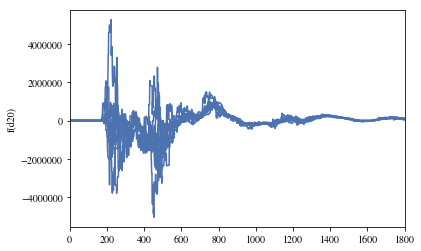

In [63]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax20) = plt.subplots(1)
ax20.set(ylabel='f(d20)')


for j in range(10):
    sns.tsplot(sampler.chain[j, :, 20], ax=ax20)


In [65]:
# prior for beta, do enzyme data
# Since it takes about 150 steps for the walkers to settle, trim the data to include only steps after 100
samples = sampler.chain[:,1500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [66]:
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,-14346.018576,5.119697e+08,4.406710e+08,5.539943e+08,1.556228e+08,4.893513e+08,97013.531480,4.460495e+08,8.409470e+04,2.035068e+08,...,1.792925e+08,3.029860e+08,2.900702e+08,1.894475e+08,2.978443e+08,4.017527e+08,2.724766e+08,2.863547e+08,5.300958e+08,5.382583e+08
0.50,59295.250286,5.156919e+08,4.438495e+08,5.572026e+08,1.585073e+08,4.945239e+08,205920.779228,4.509749e+08,1.974980e+05,2.056461e+08,...,1.821760e+08,3.057765e+08,2.937845e+08,1.931239e+08,3.016786e+08,4.052682e+08,2.783492e+08,2.963653e+08,5.316076e+08,5.410432e+08
0.84,118221.954973,5.217927e+08,4.516030e+08,5.594037e+08,1.616438e+08,5.061478e+08,840601.540844,4.536760e+08,1.349563e+06,2.096405e+08,...,1.841298e+08,3.081147e+08,2.981735e+08,1.965881e+08,3.067068e+08,4.180746e+08,2.906589e+08,3.073183e+08,5.367179e+08,5.444044e+08


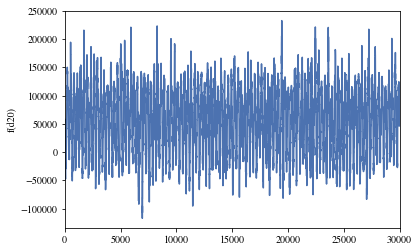

In [72]:

plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax20) = plt.subplots(1)
ax20.set(ylabel='f(d20)')

sns.tsplot(traces[20], ax=ax20)
